# Defining and Training GeneralisedLinearRegressor Model

In [21]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
#get stock data
df=pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv', index_col='minute', parse_dates=True)
df.head()

,ticker,instrument_token,open,high,low,close
minute,,,,,,
2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85


In [23]:
#check null entries
df.isnull().sum()

ticker              0
instrument_token    0
open                0
high                0
low                 0
close               0
dtype: int64

In [24]:
#check if any na
df.isna().any()

ticker              False
instrument_token    False
open                False
high                False
low                 False
close               False
dtype: bool

In [25]:
#information of stock data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1478 entries, 2017-01-02 09:15:00+05:30 to 2022-12-30 09:15:00+05:30
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticker            1478 non-null   object 
 1   instrument_token  1478 non-null   object 
 2   open              1478 non-null   float64
 3   high              1478 non-null   float64
 4   low               1478 non-null   float64
 5   close             1478 non-null   float64
dtypes: float64(4), object(2)
memory usage: 80.8+ KB


In [26]:
#describe stock
df.describe()

,open,high,low,close
count,1478.000000,1478.000000,1478.000000,1478.000000
mean,12703.472564,12766.196380,12618.730176,12695.129871
std,3013.301093,3022.293103,2991.077768,3008.326805
min,7732.100000,8036.950000,7511.100000,7634.600000
25%,10474.287500,10528.112500,10414.762500,10461.125000
50%,11510.075000,11563.775000,11437.850000,11501.800000
75%,15753.737500,15798.825000,15661.212500,15733.312500
max,18874.300000,18887.600000,18778.200000,18800.850000


<AxesSubplot:xlabel='minute'>

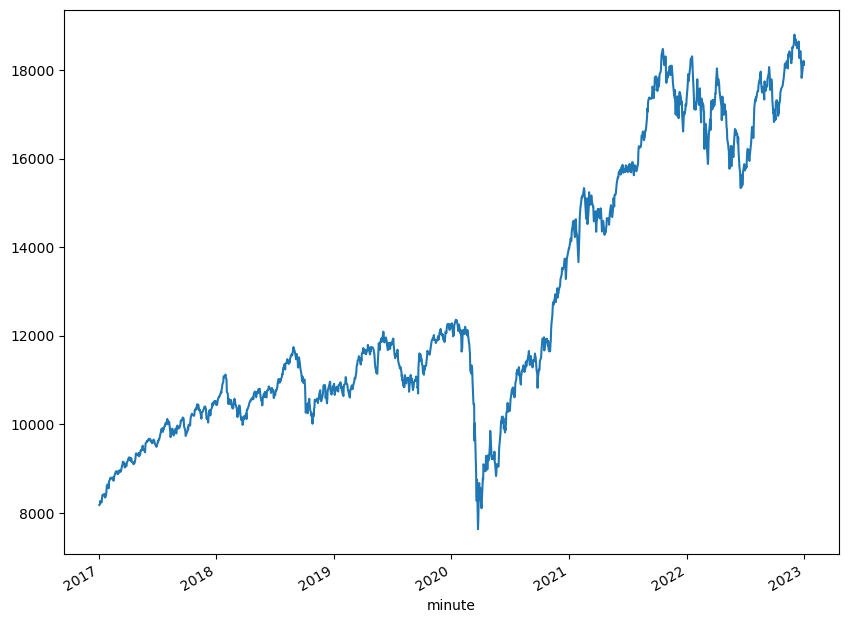

In [27]:
#plot close prices
df['close'].plot(figsize=(10,8))

In [28]:
features=['open','low','high']
target='close'

In [29]:
#x and y variables independent
x=df[features]
y=df[target]

In [30]:
#add a constant to the independent variables
x = sm.add_constant(x)

In [31]:
#divide into test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

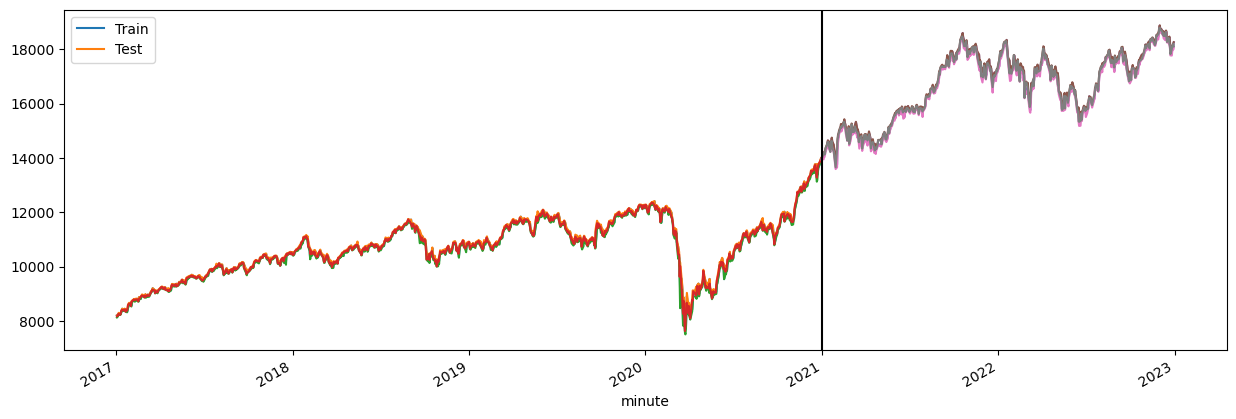

In [32]:
#train/test data plotting
train=df.loc[df.index<'01-01-2021']
test=df.loc[df.index>='31-12-2020']

fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Training Set')
test.plot(ax=ax,label='Test Set')
ax.axvline('01-01-2021',color='black')
ax.legend(['Train','Test'])
plt.show()

In [33]:
print(x_train.shape,x_test.shape)

(1108, 4) (370, 4)


In [34]:
# Define the link function and the probability distribution
family = sm.families.Gaussian()

In [35]:
#get generalized linear regressor, and train on x and y data
genregressor = sm.GLM(y_train, x_train, family=family)
result=genregressor.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  close   No. Observations:                 1108
Model:                            GLM   Df Residuals:                     1104
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          2173.4
Method:                          IRLS   Log-Likelihood:                -5827.2
Date:                Thu, 30 Mar 2023   Deviance:                   2.3995e+06
Time:                        17:17:46   Pearson chi2:                 2.40e+06
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6278      6.060     -3.239      0.0

In [36]:
#predict value against test
y_pred=result.predict(x_test)

In [37]:
y_pred.shape

(370,)

In [38]:
#another dataframe to store original and predicted
_df= pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(_df)

                           Actual Price  Predicted Price
minute                                                  
2019-04-12 09:15:00+05:30      11631.55     11627.484811
2020-01-15 09:15:00+05:30      12340.35     12300.504881
2018-10-08 09:15:00+05:30      10350.15     10310.761381
2021-03-25 09:15:00+05:30      14348.25     14334.400966
2022-01-20 09:15:00+05:30      17777.85     17719.946651
...                                 ...              ...
2021-06-22 09:15:00+05:30      15765.85     15834.290553
2021-03-30 09:15:00+05:30      14853.55     14851.586435
2022-11-18 09:15:00+05:30      18304.55     18264.627675
2019-08-30 09:15:00+05:30      11033.85     10946.307453
2019-06-06 09:15:00+05:30      11849.70     11876.788423

[370 rows x 2 columns]


In [39]:
#evaluate model's performance on train data
predict = result.predict(x_train)
r2 = r2_score(y_train, predict)
mse = mean_squared_error(y_train, predict)
rmse = mean_squared_error(y_train, predict, squared=False)
mae = mean_absolute_error(y_train, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9997654152314708
Mean Squared Error: 2165.5842845477955
Root Mean Squared Error: 46.53583871112452
Mean Absolute Error: 30.874954161808738


In [40]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9998250259929244
Mean Squared Error: 1482.4536608929752
Root Mean Squared Error: 38.50264485581445
Mean Absolute Error: 28.059063020296623


# Predict close price on test OHL(open, high, low)

In [41]:
#define model
genregressor = sm.GLM(train[target], train[features], family=family)
result=genregressor.fit()

In [42]:
#predictions for data
test_ohl=test[features]
y_pred = result.predict(test_ohl)

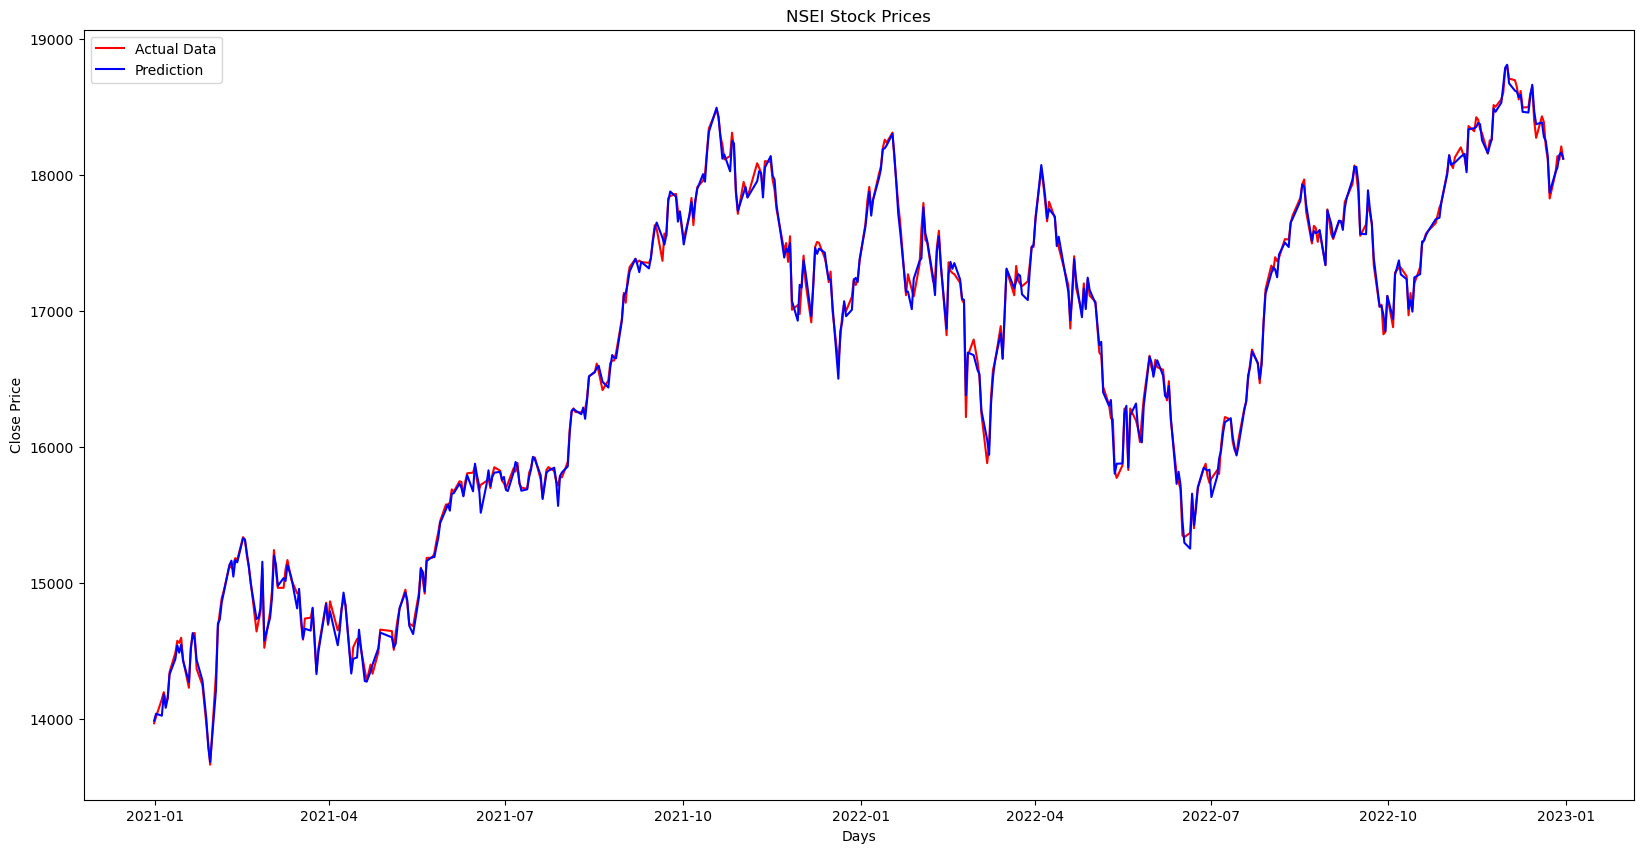

In [43]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(test.index,test[target], color = 'red', label="Actual Data")
plt.plot(test.index,y_pred, color='blue', label="Prediction")

plt.title('NSEI Stock Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [44]:
#getting dataframe
import pytz
data_=[]
index_ = test.index.tolist()

try:
    for i in range(1,len(index_)):          
        if y_pred[i-1]<test[index_[i-1].strftime('%Y-%m-%d')].close[0]:
            direction='SELL'
            data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred[i-1], 'Pnl':test[index_[i-1].strftime('%Y-%m-%d')].close[0]-test[index_[i].strftime('%Y-%m-%d')].close[0]})
        else:
            direction='BUY'
            data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred[i-1], 'Pnl':test[index_[i].strftime('%Y-%m-%d')].close[0]-test[index_[i-1].strftime('%Y-%m-%d')].close[0]})

    
except KeyboardInterrupt or ValueError:
    print("Output is Stored in csv file: NSEI_STOCK.CSV!")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  # Remove the CWD from sys.path while we load stuff.


In [45]:
#storing in csv file
import csv
import os

headers = ['Date', 'Day', 'Current Close Price', 'Next Day Price','Predicted Direction', 'Predicted Value','Pnl']

if os.path.exists('/kaggle/working/nsei_stock.csv'):
    with open('nsei_stock.csv', mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        for row in data_:
            writer.writerow(row)
else:
    with open('nsei_stock.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for row in data_:
            writer.writerow(row)

# Get Next Day Price

In [46]:
#install yfinance library that helps in stock data retrieval 
!pip install yfinance
import yfinance as yf
from time import time
import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 2.2 MB/s eta 0:00:00


In [47]:
#to import NSEI stock data, set ticker symbol to ^NSEI
tickerSymbol = '^NSEI'
data = yf.Ticker(tickerSymbol)

In [48]:
#retrieve data from this day one year before to today
end_date = datetime.date.today() - datetime.timedelta(days=1)
start_date = end_date - datetime.timedelta(days=365)
day = datetime.date.today()
stock = data.history(start=start_date, end=end_date)

In [49]:
#last day open, high and low price
stock.iloc[-1][['Open','High','Low']]

Open    17031.75
High    17061.75
Low     16913.75
Name: 2023-03-28 00:00:00+05:30, dtype: float64

In [50]:
def next_day_price(stock, day):
    x=stock[['Open','High','Low']]
    y=stock['Close']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    genregressor = sm.GLM(y_train, x_train, family=family)
    result=genregressor.fit()
    predicted_price=result.predict([stock.iloc[-1][['Open','High','Low']]])
    print(f"Predicted price for the {day}:", predicted_price)

In [51]:
#predict price
next_day_price(stock,day)

Predicted price for the 2023-03-30: [16969.43954334]
